In [15]:
from astropy.io import fits
import matplotlib.pyplot as plt


image = fits.open('../Lab_1/pretty_pics/lab1_pretty_pic_point_five_visible.00000001.FIT')

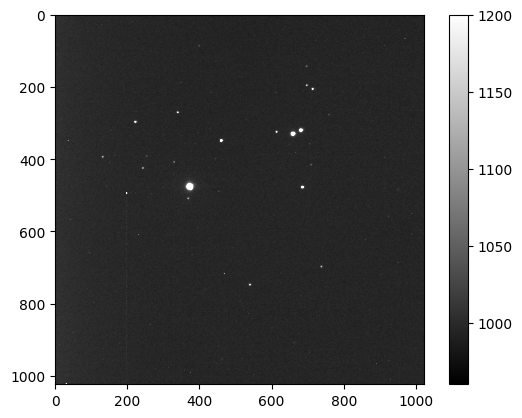

In [16]:
data = image[0].data

plt.imshow(data,cmap='gray',vmax=1200)
plt.colorbar()